In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


In [2]:
from scipy.integrate import solve_ivp

In [3]:
a = -0.025794
c = 0.02
b1 = 0.0135
b2 = 0.0065
k = 0.129
sigma = 1
alpha = 0.35
eps = 1
beta = 10e-8
q=1.6

In [4]:
def FHN(self, X):
        x1, y1, x2, y2 = X
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                b1*x1 - c*y1,
                x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                b2*x2 - c*y2
               ]

In [5]:
def jac(t, X):
    x1, y1, x2, y2 = X
    jacobian = np.zeros((4, 4))
    jacobian[0][0] = -3*x1**2 + 2*a*x1 + 2*x1 - k
    jacobian[0][1] = -1
    jacobian[0][2] = k
    jacobian[1][0] = b1
    jacobian[1][1] = -c
    jacobian[2][0] = k
    jacobian[2][2] = -3*x2**2 + 2*a*x2 + 2*x2 - k
    jacobian[2][3] = -1
    jacobian[1][2] = b2
    jacobian[1][3] = -c
    return jacobian

In [6]:
sol = solve_ivp(FHN, [0, 25000], [0.1, 0.1, 0.1, 0.1], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [7]:
#sol = solve_ivp(FHN, [0, 10000], [0.1, 0.1, 0.1, 0.1], method='LSODA', first_step=2, max_step=2, jac=jac, 
                # min_step=1.5, dense_output=True)

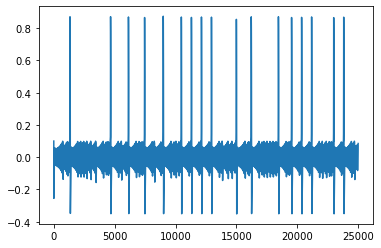

In [8]:
plt.plot(sol.t,sol.y[0])

In [9]:
#sol2 = solve_ivp(FHN, [2000, 25000], sol.y[:, 1000], 
 #                t_eval=np.array(range(2000, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [10]:
#plt.plot(sol2.t + 2000,sol2.y[0])

In [11]:
T = [21100, 21920, 23260]
G = [0]

In [12]:
def FHN_sup(t, X):
    x1, y1, x2, y2 = X
    if G[0] < len(T) and np.abs(t - T[G[0]]) < 50:
        print(t)
        G[0] += 1  
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1) - 1e-3,
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]
        
    return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]

In [13]:
sol_sup = solve_ivp(FHN_sup, [0, 25000], [-2.24, -3.31, 1.012, 5.123], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

21050.246631242655
21870.072645659304
23210.081455186933


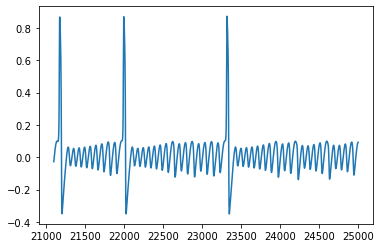

In [14]:
plt.plot(sol_sup.t[21100//2:] ,sol_sup.y[0][21100//2:])

In [15]:
#plt.plot(sol.t[10000:] ,test)

In [13]:
train = sol.y[0][100:10000]
test = sol.y[0][10000:] 
#test = sol2.y[0]

In [14]:
mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [15]:
W_in = np.random.uniform(-sigma, sigma, (1000, 1))

In [16]:
from skimage.io import imshow

In [17]:
def erdos_renyi(n=1000, p=0.6):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            if np.random.uniform(0, 1) > p:
                a = np.random.uniform(-1, 1)
                A[i][j] = a
                A[j][i] = a
                
        A[i][i] = 0
            
    return A

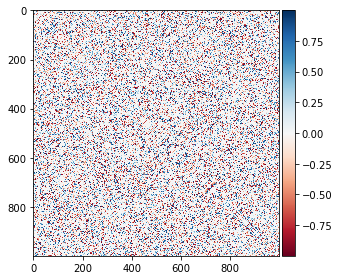

In [18]:
A = erdos_renyi()
imshow(A)

In [19]:
A = A/np.linalg.eig(A)[0].max()*q

In [20]:
np.linalg.eig(A)[0].max()

1.6000000000000112

In [26]:
def reservoir(U):
    r = np.random.uniform(1, -1, (1000, 1))
    R = np.zeros((1000, len(U)))
    R[:, 0] = r[:, 0]
    for i in range(1, len(U)):
        r = (1-alpha)*r + np.tanh(A@r + W_in*U[i] + eps) #U[i] is a number
        print((W_in*U[i]).shape)
        R[:, i] = r[:, 0]
    return R

In [27]:
#R = reservoir(train)
R = reservoir(train_norm)

(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


In [232]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=beta)
#reg.fit(R.T, train)
reg.fit(R.T, train_norm)

Ridge(alpha=1e-07)

In [27]:
def reservoir_step(r, v):
    return (1-alpha)*r + np.tanh(A@r + W_in*v + eps)

In [28]:
r = np.expand_dims(R[:, -1], axis=1)
def predict(r, v):
    r = reservoir_step(r, v)
    v_new = reg.predict(r.reshape((1, 1000)))
    return r, v_new

In [29]:
from IPython.display import clear_output


In [223]:
all_rms = []
for M in [10, 20, 25, 30]:
    v = test[0]
    predicted = []
    rms = []
    r = np.expand_dims(R[:, -1], axis=1)
    for i in range(len(test)):
        if i%M == 0 and i != 0:
            rms.append((v-test[i])**2)
            v = test[i]        
        r, v = predict(r, v)
        predicted.append(v)
    all_rms.append(np.mean(rms)**0.5)

In [224]:
all_rms

[12417.409512247976, 12562.61768535667, 12564.34934669388, 12564.551329252034]

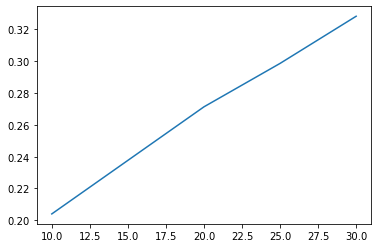

In [210]:
plt.plot([10, 20, 25, 30], all_rms)

In [33]:
np.mean(rms)**0.5

18388.844048948195

In [233]:
v = test[0]
predicted = []
rms = []
r = np.expand_dims(R[:, -1], axis=1)
#r = reservoir_step(r, train[-1])
r = reservoir_step(r, train_norm[-1])
for i in range(len(test)):
    if i<160:
        #rms.append((v-test[i])**2)
        #v = test[i] 
        v = test_norm[i] 
        predicted.append(mean + v*std)
        r, v = predict(r, v)
    else:
    #if mean + v*sigmastest[i] < -800.2:
        r, v = predict(r, v)
        #print(i%10, i, v, sigmastr[i])
        predicted.append(mean + v*std)

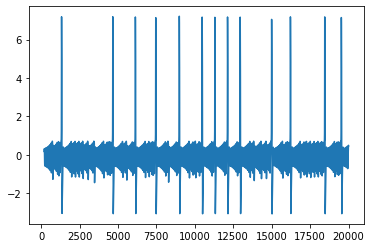

In [234]:
plt.plot(sol.t[100:10000], reg.predict(R.T))

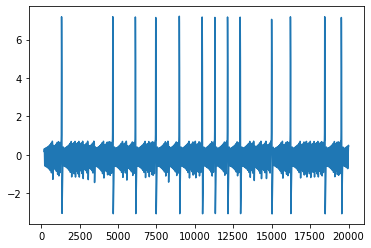

In [235]:
plt.plot(sol.t[100:10000], train_norm)

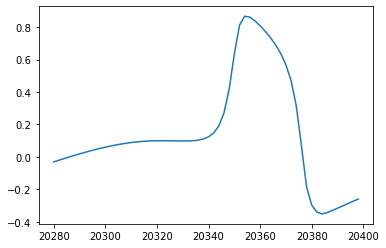

In [236]:
plt.plot(sol.t[10000:][140:200],test[140:200])
#plt.plot(sol2.t,test)

D:\miniconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


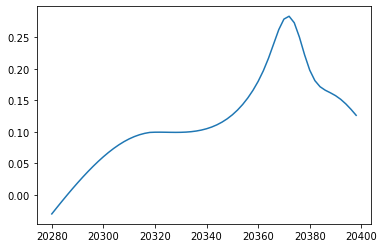

In [237]:
plt.plot(sol.t[10000:][140:200],predicted[140:200])
#plt.plot(sol2.t,predicted)

In [ ]:
#plt.plot(sol.t[10000:], predicted)
#plt.plot(sol.t[10000:], test)

In [ ]:
def FHN_correcting(t, X):    
        x1, y1, x2, y2 = X
        if t == t_global:
            
            return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1) - 1e4,
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]
        
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]

In [ ]:
t_global = 11180

In [ ]:
#smth = solve_ivp(FHN_correcting, [t_global, 25000], new_data[:, i], 
                            # t_eval=np.array(range(t_global, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [ ]:
plt.plot(smth.t, smth.y[0])

In [ ]:
t_global

In [ ]:
new_data[:, i]

In [ ]:
v = test[0]
new_data = sol.y[:, 10000:] 
predicted = []
rms = []
r = np.expand_dims(R[:, -1], axis=1)
t_global = 10000
i = 0 
while i < len(new_data[0]):
    if i%10 == 0 and i != 0:
        #rms.append((v-test[i])**2)
        v = new_data[0, i] 
    if v > 0.4:
        new_data = solve_ivp(FHN_correcting, [t_global, 25000], new_data[:, i], 
                             t_eval=np.array(range(t_global, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True).y
        i = 0
    r, v = predict(r, v)
    predicted.append(v)
    t_global += 2
    i += 1

In [ ]:
plt.plot(predicted)